# Import libraries 

In [1]:
#Libraries for general purpose
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Text cleaning
import re, string
import nltk
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

#Data preprocessing
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

#Naive Bayes
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB


#PyTorch LSTM
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler

#Tokenization for LSTM
from collections import Counter
from gensim.models import Word2Vec


from sklearn.metrics import classification_report, confusion_matrix

#Seed for reproducibility
import random

seed_value=42
random.seed(seed_value)
np.random.seed(seed_value)
torch.manual_seed(seed_value)
torch.cuda.manual_seed_all(seed_value)

import time

#set style for plots
sns.set_style("whitegrid")
sns.despine()
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True)
plt.rc("axes", labelweight="bold", labelsize="large", titleweight="bold", titlepad=10)


import sklearn
import os
import random
import torch
import torch.nn as nn
import torch.nn.functional as F
from collections import Counter
from tqdm import tqdm
import matplotlib.pyplot as plt
from torch.utils.data import TensorDataset, DataLoader
import nltk
import scapy
import re
import warnings
import gensim
os.environ['KMP_DUPLICATE_LIB_OK']='True'
warnings.filterwarnings('ignore')
from nltk.corpus import stopwords
from gensim.models import Word2Vec
from nltk.stem.isri import ISRIStemmer
import pyarabic.araby as araby
from textblob import TextBlob
from sklearn.model_selection import train_test_split
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mido_\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

<Figure size 640x480 with 0 Axes>

# Check GPU

In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Using device:', device)

Using device: cuda


In [3]:
if device.type == 'cuda':
    print(torch.cuda.get_device_name(0))
    print('Memory Usage:')
    print('Allocated:', round(torch.cuda.memory_allocated(0)/1024**3,1), 'GB')
    print('Cached:   ', round(torch.cuda.memory_reserved(0)/1024**3,1), 'GB')

NVIDIA GeForce GTX 1060
Memory Usage:
Allocated: 0.0 GB
Cached:    0.0 GB


# import data

In [4]:
df = pd.read_csv("BRAD.tsv",sep='\t')
df.columns = ['label' , 'ID1' , 'ID2' , 'ID3' , 'sentence']
cleaned = df.drop(['ID1' , 'ID2' , 'ID3'], axis=1)
cleaned.head()

,label,sentence
0,5,كتاب رائع. اعتقد ان الروايه كلها تلخصت بجمله و...
1,4,رواية تلامس الروح بعمقها، فخورة اني اخيرا لقيت...
2,5,رواية محكمة بكل اختصار. وكان الجزء المفضل بالن...
3,3,هذا الكتاب يحزن مرا، ظلم واضطهاد عيسى بلا ذنب ...
4,4,رواية واقعية ورائعة تمثل أحداث تكررت كثيرا في ...


In [5]:
def mark_sentiment(rating):
    if(rating<3):
        return 0
    else:
        return 1

In [6]:
cleaned['label'] = cleaned['label'].apply(lambda x:mark_sentiment(x))
cleaned.head()

,label,sentence
0,1,كتاب رائع. اعتقد ان الروايه كلها تلخصت بجمله و...
1,1,رواية تلامس الروح بعمقها، فخورة اني اخيرا لقيت...
2,1,رواية محكمة بكل اختصار. وكان الجزء المفضل بالن...
3,1,هذا الكتاب يحزن مرا، ظلم واضطهاد عيسى بلا ذنب ...
4,1,رواية واقعية ورائعة تمثل أحداث تكررت كثيرا في ...


In [7]:
stops = set(stopwords.words("arabic"))
stop_word_comp = {"،","آض","آمينَ","آه","آهاً","آي","أ","أب","أجل","أجمع","أخ","أخذ","أصبح","أضحى","أقبل","أقل","أكثر","ألا","أم","أما","أمامك","أمامكَ","أمسى","أمّا","أن","أنا","أنت","أنتم","أنتما","أنتن","أنتِ","أنشأ","أنّى","أو","أوشك","أولئك","أولئكم","أولاء","أولالك","أوّهْ","أي","أيا","أين","أينما","أيّ","أَنَّ","أََيُّ","أُفٍّ","إذ","إذا","إذاً","إذما","إذن","إلى","إليكم","إليكما","إليكنّ","إليكَ","إلَيْكَ","إلّا","إمّا","إن","إنّما","إي","إياك","إياكم","إياكما","إياكن","إيانا","إياه","إياها","إياهم","إياهما","إياهن","إياي","إيهٍ","إِنَّ","ا","ابتدأ","اثر","اجل","احد","اخرى","اخلولق","اذا","اربعة","ارتدّ","استحال","اطار","اعادة","اعلنت","اف","اكثر","اكد","الألاء","الألى","الا","الاخيرة","الان","الاول","الاولى","التى","التي","الثاني","الثانية","الذاتي","الذى","الذي","الذين","السابق","الف","اللائي","اللاتي","اللتان","اللتيا","اللتين","اللذان","اللذين","اللواتي","الماضي","المقبل","الوقت","الى","اليوم","اما","امام","امس","ان","انبرى","انقلب","انه","انها","او","اول","اي","ايار","ايام","ايضا","ب","بات","باسم","بان","بخٍ","برس","بسبب","بسّ","بشكل","بضع","بطآن","بعد","بعض","بك","بكم","بكما","بكن","بل","بلى","بما","بماذا","بمن","بن","بنا","به","بها","بي","بيد","بين","بَسْ","بَلْهَ","بِئْسَ","تانِ","تانِك","تبدّل","تجاه","تحوّل","تلقاء","تلك","تلكم","تلكما","تم","تينك","تَيْنِ","تِه","تِي","ثلاثة","ثم","ثمّ","ثمّة","ثُمَّ","جعل","جلل","جميع","جير","حار","حاشا","حاليا","حاي","حتى","حرى","حسب","حم","حوالى","حول","حيث","حيثما","حين","حيَّ","حَبَّذَا","حَتَّى","حَذارِ","خلا","خلال","دون","دونك","ذا","ذات","ذاك","ذانك","ذانِ","ذلك","ذلكم","ذلكما","ذلكن","ذو","ذوا","ذواتا","ذواتي","ذيت","ذينك","ذَيْنِ","ذِه","ذِي","راح","رجع","رويدك","ريث","رُبَّ","زيارة","سبحان","سرعان","سنة","سنوات","سوف","سوى","سَاءَ","سَاءَمَا","شبه","شخصا","شرع","شَتَّانَ","صار","صباح","صفر","صهٍ","صهْ","ضد","ضمن","طاق","طالما","طفق","طَق","ظلّ","عاد","عام","عاما","عامة","عدا","عدة","عدد","عدم","عسى","عشر","عشرة","علق","على","عليك","عليه","عليها","علًّ","عن","عند","عندما","عوض","عين","عَدَسْ","عَمَّا","غدا","غير","ـ","ف","فان","فلان","فو","فى","في","فيم","فيما","فيه","فيها","قال","قام","قبل","قد","قطّ","قلما","قوة","كأنّما","كأين","كأيّ","كأيّن","كاد","كان","كانت","كذا","كذلك","كرب","كل","كلا","كلاهما","كلتا","كلم","كليكما","كليهما","كلّما","كلَّا","كم","كما","كي","كيت","كيف","كيفما","كَأَنَّ","كِخ","لئن","لا","لات","لاسيما","لدن","لدى","لعمر","لقاء","لك","لكم","لكما","لكن","لكنَّما","لكي","لكيلا","للامم","لم","لما","لمّا","لن","لنا","له","لها","لو","لوكالة","لولا","لوما","لي","لَسْتَ","لَسْتُ","لَسْتُم","لَسْتُمَا","لَسْتُنَّ","لَسْتِ","لَسْنَ","لَعَلَّ","لَكِنَّ","لَيْتَ","لَيْسَ","لَيْسَا","لَيْسَتَا","لَيْسَتْ","لَيْسُوا","لَِسْنَا","ما","ماانفك","مابرح","مادام","ماذا","مازال","مافتئ","مايو","متى","مثل","مذ","مساء","مع","معاذ","مقابل","مكانكم","مكانكما","مكانكنّ","مكانَك","مليار","مليون","مما","ممن","من","منذ","منها","مه","مهما","مَنْ","مِن","نحن","نحو","نعم","نفس","نفسه","نهاية","نَخْ","نِعِمّا","نِعْمَ","ها","هاؤم","هاكَ","هاهنا","هبّ","هذا","هذه","هكذا","هل","هلمَّ","هلّا","هم","هما","هن","هنا","هناك","هنالك","هو","هي","هيا","هيت","هيّا","هَؤلاء","هَاتانِ","هَاتَيْنِ","هَاتِه","هَاتِي","هَجْ","هَذا","هَذانِ","هَذَيْنِ","هَذِه","هَذِي","هَيْهَاتَ","و","و6","وا","واحد","واضاف","واضافت","واكد","وان","واهاً","واوضح","وراءَك","وفي","وقال","وقالت","وقد","وقف","وكان","وكانت","ولا","ولم","ومن","مَن","وهو","وهي","ويكأنّ","وَيْ","وُشْكَانََ","يكون","يمكن","يوم","كان","ّأيّان"}

In [8]:
st = ISRIStemmer()
def stemNLTK(text):
    # tokenize
    zen = TextBlob(text)
    words = zen.words
    cleaned = list()
    for w in words:
        ty = st.stem(w)
        cleaned.append(ty)
    return " ".join(cleaned)

stemNLTK("كتاب رائع. اعتقد ان الروايه كلها تلخصت بجمله ")

'كتب رئع عقد ان ريه كله لخص جمل'

In [9]:
def normalizeArabic(text):
    text = text.strip()
    text = re.sub("[إأٱآا]", "ا", text)
    text = re.sub("ى", "ي", text)
    text = re.sub("ؤ", "ء", text)
    text = re.sub("ئ", "ء", text)
    text = re.sub("ة", "ه", text)
    noise = re.compile(""" ّ    | # Tashdid
                             َ    | # Fatha
                             ً    | # Tanwin Fath
                             ُ    | # Damma
                             ٌ    | # Tanwin Damm
                             ِ    | # Kasra
                             ٍ    | # Tanwin Kasr
                             ْ    | # Sukun
                             ـ     # Tatwil/Kashida
                         """, re.VERBOSE)
    text = re.sub(noise, '', text)
    text = re.sub(r'(.)\1+', r"\1\1", text) # Remove longation
    return araby.strip_tashkeel(text)

normalizeArabic("مَرَّتْ أوَانَ العِيدِ بَيْنَ نَوَاهِدٍ مِثْلِ الشُّمُوسِ لِحَاظُهُنَّ ظِبَاء")

'مرت اوان العيد بين نواهد مثل الشموس لحاظهن ظباء'

In [10]:
def remove_stop_words(text):
    zen = TextBlob(text)
    words = zen.words
    return " ".join([w for w in words if not w in stops and not w in stop_word_comp and len(w) >= 2])

remove_stop_words("مرت اوان العيد بين نواهد مثل الشموس لحاظهن ظباء")

'مرت اوان العيد نواهد الشموس لحاظهن ظباء'

In [11]:
def clean_text(text):
    ## Remove punctuations
    text = re.sub('[%s]' % re.escape("""!"#$%&'()*+,،-./:;<=>؟?@[\]^_`{|}~"""), ' ', text)  # remove punctuation
    ## remove extra whitespace
    text = re.sub('\s+', ' ', text)
    ## Convert text to lowercases
    text = text.lower()
    ## Remove stop words
    text = remove_stop_words(text)
    ## Remove numbers
    text = re.sub("\d+", " ", text)
    ## Remove Tashkeel
    text = normalizeArabic(text)
    #text = re.sub('\W+', ' ', text)
    text = re.sub('[A-Za-z]+',' ',text)
    text = re.sub(r'\\u[A-Za-z0-9\\]+',' ',text)
    ## remove extra whitespace
    text = re.sub('\s+', ' ', text)
    #Stemming
    text = stemNLTK(text)
    return text

In [12]:
%time
cleaned['sentence'] = cleaned['sentence'].apply(lambda x:clean_text(x))
cleaned.head()

Wall time: 0 ns


,label,sentence
0,1,كتب رءع عقد ريه كله لخص جمل وحد عطء حب قيم
1,1,ريه لمس روح عمق فخر اني اخر لقت ريه عرب كتب به...
2,1,ريه حكم بكل خصر جزء فضل نسب وصف كتب حيه عيس فل...
3,1,كتب يحز مرا ظلم ضطهاد عيس بلا ذنب فصل كتب خلف ...
4,1,ريه وقع رءع مثل حدث كرر جمع خلج ونا تثر لني عش...


In [13]:
cleaned['sentence'].duplicated().sum()

15022

In [14]:
cleaned.drop_duplicates("sentence", inplace=True)
data = cleaned

# Calculate Length of sentence and preprocessing

In [15]:
text_len = []
for text in data.sentence:
    tweet_len = len(text.split())
    text_len.append(tweet_len)
data['text_len'] = text_len

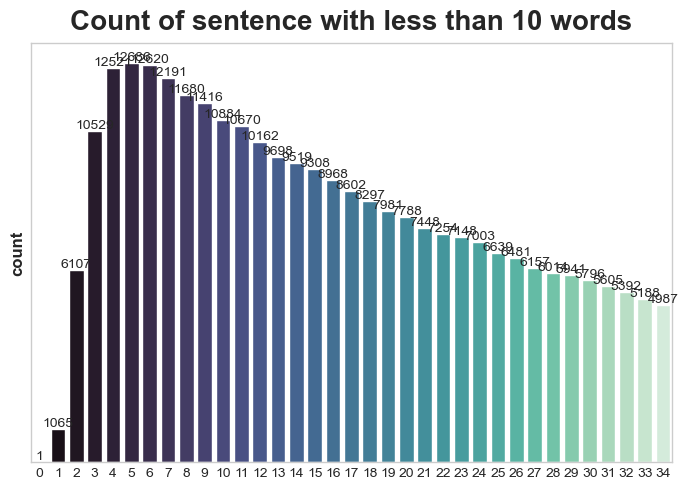

In [16]:
plt.figure(figsize=(7,5))

ax = sns.countplot(x='text_len', data=data[data['text_len'] < 35 ], palette='mako')
plt.title('Count of sentence with less than 10 words', fontsize=20)
plt.yticks([])
ax.bar_label(ax.containers[0])
plt.ylabel('count')
plt.xlabel('')
plt.show()

In [17]:
data = data[data['text_len'] > 1]

In [18]:
data.sort_values(by=['text_len'], ascending=False)

,label,sentence,text_len
58006,1,جرم فعل جمع صدقاء عصم وسف جمل روي الل قرت بجد ...,1204
501177,0,عقد غلط طبع اسم فرض يبق اسم فرق نجي عطا الل لل...,1202
68388,1,ولد حرت ارخ بشر خلق قدم بدي انا كنت سمع قصه دي...,1172
119987,1,لحم حرافيش نجب حفظ عشر نجي خرج الي حره ظلم وعد...,1160
257072,1,عسل اتم غلف كتب قرء لهم ودا الل حصل فعل حسه اد...,1147
...,...,...,...
103474,1,جمل رهق,2
103444,1,حله صعب,2
103426,1,الم الم,2
103394,1,بسط خراف,2


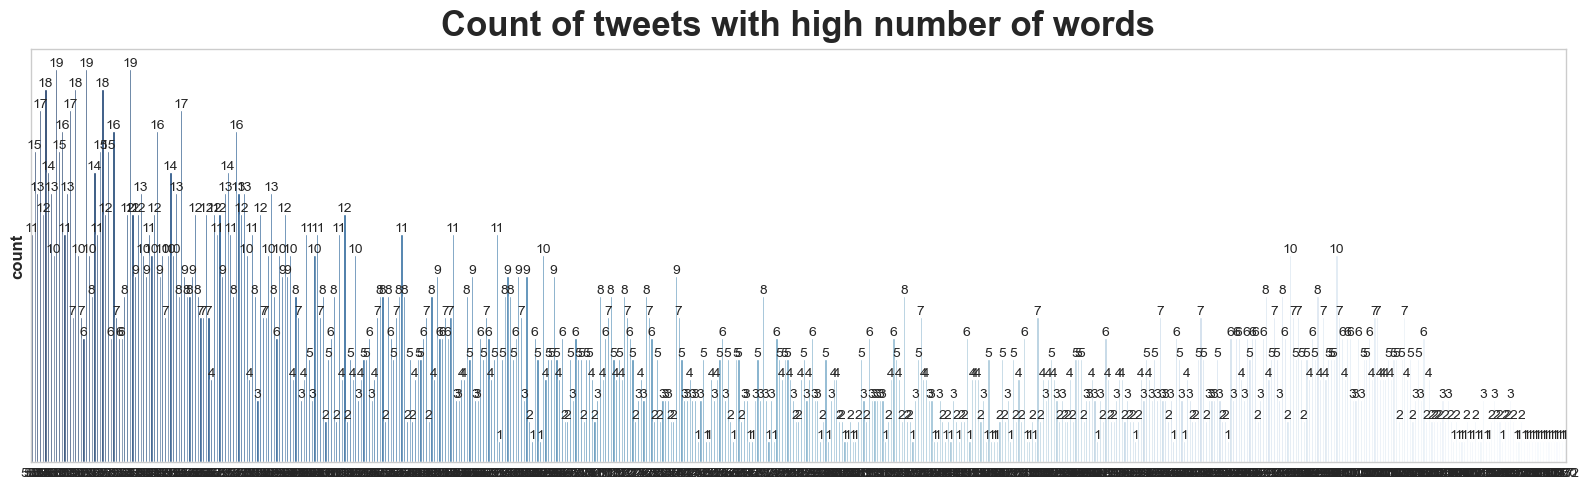

In [19]:
plt.figure(figsize=(16,5))
ax = sns.countplot(x='text_len', data=data[(data['text_len']<=1200) & (data['text_len']>500)], palette='Blues_r')
plt.title('Count of tweets with high number of words', fontsize=25)
plt.yticks([])
ax.bar_label(ax.containers[0])
plt.ylabel('count')
plt.xlabel('')
plt.show()

In [20]:
data = data[data['text_len'] < 100]

In [21]:
max_len = np.max(data['text_len'])
max_len 

99

In [22]:
data.label.value_counts()

1    358961
0     67422
Name: label, dtype: int64

In [23]:
data.sort_values(by=["text_len"], ascending=False)

,label,sentence,text_len
347753,1,حسن ابد عرق اجد تخبط محاولاتي كتب رجع ريه بطل ...,99
499634,1,بحب رجل شعر داء انن امل شء تجد داء شكل كتب خوف...,99
118228,1,هذاالكتاب اعد ذكر ورء جمع حدث مر كتب سوء رحل س...,99
118261,1,عنو صدم لمن فهم غيت ولم فهم سوء عكس صدق توقع ط...,99
336455,1,غزل بنت اسم لفت لذذ جدا ذكر بدر شوك نعم بلذ وخ...,99
...,...,...,...
22695,1,كتب اهب,2
22702,1,تسم ريه,2
147077,1,متع خرف,2
60832,1,رءع نصف,2


# Balancing Data Classes

In [24]:
data.label.value_counts()

1    358961
0     67422
Name: label, dtype: int64

<AxesSubplot:xlabel='label', ylabel='count'>

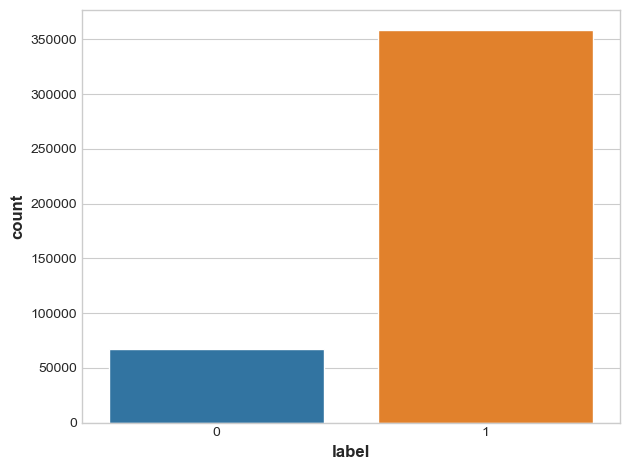

In [25]:
sns.countplot(x=data["label"])

In [26]:
datasetNeg , datasetPos, = (g for _,g in data.groupby('label'))
datasetPos = datasetPos.iloc[(358961 -67422 ) : ]
data = pd.concat([datasetPos,datasetNeg])
data.label.value_counts()

1    67422
0    67422
Name: label, dtype: int64

# Train and test and validation splitting

In [27]:
X = data['sentence']
y = data['label']

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=seed_value)

In [29]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.1, stratify=y_train, random_state=seed_value)

In [30]:
(unique, counts) = np.unique(y_train, return_counts=True)
np.asarray((unique, counts)).T

array([[    0, 48543],
       [    1, 48544]], dtype=int64)

# PyTorch CNN

In [31]:
def Tokenize(column, seq_len):
    ##Create vocabulary of words from column
    corpus = [word for text in column for word in text.split()]
    count_words = Counter(corpus)
    sorted_words = count_words.most_common()
    vocab_to_int = {w : i+1 for i, (w,c) in enumerate(sorted_words)}

    ##Tokenize the columns text using the vocabulary
    text_int = []
    for text in column:
        r = [vocab_to_int[word] for word in text.split()]
        text_int.append(r)
    ##Add padding to tokens
    features = np.zeros((len(text_int), seq_len), dtype = int)
    for i, review in enumerate(text_int):
        if len(review) <= seq_len:
            zeros = list(np.zeros(seq_len - len(review)))
            new = zeros + review
        else:
            new = review[: seq_len]
        features[i, :] = np.array(new)

    return vocab_to_int, features

In [32]:
vocabulary, tokenized_column = Tokenize(data["sentence"], max_len)

In [33]:
data["sentence"].iloc[10]

'حدث كتب تغل نمط لاسفيجاسي عبر كتب لاس يجس علي طقه خلج حال وسع كعب تخذ نمط اسس رعا لاي خصص قدس ارخ كان يءد الي شوه شكل كعب سلب روح جعل قطع دول خلج دبي بدر قطع لاس يجس شيكاغو مدن علم عرض كتب بدي شرع وسع وين عكس غلب بحث وضع حلل شكل صرح فرص اخر تدر شكل عمر لفت نبه كتب صور وضح تطر شرع وسع والتي تعط رءه مكه ومك كءن قول نقد عمر وضع'

In [34]:
tokenized_column[10]

array([    0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     4,     1,  6206,   982, 19102,    30,     1,
        6307, 10129,    39,  1007,  1030,   133,   477,  3547,   660,
         982,   554,  3628,   761,   248,   604,    56,   207,  2140,
         139,   285,    72,  3547,    10,   177,    82,   317,   237,
        1030,  3104,   946,   317,  6307, 10129,  4988,  1461,     9,
         106,     1,    77,   347,   477,  1974,   353,   181,   120,
          51,   233,    72,   196,   893,    13,   459,    72,   163,
         704,   708,     1,   149,   110,   511,   347,   477,   526,
        1304,   630,  3629,  2302,  1230,   350,   272,   163,    51])

# Word Embedding by Word2Vec

In [35]:
Word2vec_train_data = list(map(lambda x: x.split(), X_train))

In [36]:
EMBEDDING_DIM = 156

In [37]:
word2vec_model = Word2Vec(Word2vec_train_data, vector_size=EMBEDDING_DIM)

In [38]:
print(f"Vocabulary size: {len(vocabulary) + 1}")

Vocabulary size: 40872


In [39]:
VOCAB_SIZE = len(vocabulary) + 1 #+1 for the padding

In [40]:
print(tokenized_column)

[[    0     0     0 ...   375   255    23]
 [    0     0     0 ...     1   608    43]
 [    0     0     0 ...   720  1316  1391]
 ...
 [    0     0     0 ...   765  1616  4253]
 [    0     0     0 ...     2   463   463]
 [    0     0     0 ...   375 19073   191]]


In [41]:
#define empty embedding matrix
embedding_matrix = np.zeros((VOCAB_SIZE , EMBEDDING_DIM))
    
#fill the embedding matrix with the pre trained values from word2vec
#    corresponding to word (string), token (number associated to the word)
for word, token in vocabulary.items():
    if word2vec_model.wv.__contains__(word):
        embedding_matrix[token] = word2vec_model.wv.__getitem__(word)

print("Embedding Matrix Shape:", embedding_matrix.shape)

Embedding Matrix Shape: (40872, 156)


# Train - Validation - Test split

In [42]:
X = tokenized_column
y = data['label'].values

In [43]:
print(y)

[1 1 1 ... 0 0 0]


In [44]:
X_train, X_test, y_train, y_test = train_test_split( X , y , test_size = 0.2, stratify=y, random_state=seed_value)

In [45]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.1, stratify=y_train, random_state=seed_value)

In [46]:
(unique, counts) = np.unique(y_train, return_counts=True)
np.asarray((unique, counts)).T

array([[    0, 48543],
       [    1, 48544]], dtype=int64)

# PyTorch datasets and dataloaders

In [77]:
train_data = TensorDataset(torch.from_numpy(X_train), torch.from_numpy(y_train))
test_data = TensorDataset(torch.from_numpy(X_test), torch.from_numpy(y_test))
valid_data = TensorDataset(torch.from_numpy(X_valid), torch.from_numpy(y_valid))

In [78]:
train_loader = DataLoader(train_data, shuffle=True, batch_size=BATCH_SIZE, drop_last=True) 
valid_loader = DataLoader(valid_data, shuffle=True, batch_size=BATCH_SIZE, drop_last=True)
test_loader = DataLoader(test_data, shuffle=True, batch_size=BATCH_SIZE, drop_last=True)

# PyTorch CNN modeling

In [79]:
EMBEDDING_SIZE = EMBEDDING_DIM
NUM_FILTERS = 10
import gensim
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Device available for running: " + str(device))

#torch.nn.Conv2d(in_channels: int, out_channels: int, kernel_size: Union[T, Tuple[T, T]], 
#stride: Union[T, Tuple[T, T]] = 1, padding: Union[T, Tuple[T, T]] = 0, 
#dilation: Union[T, Tuple[T, T]] = 1, groups: int = 1, bias: bool = True, padding_mode: str = 'zeros')

class CnnTextClassifier(nn.Module):
    def __init__(self, vocab_size, num_classes, window_sizes=(1,2,3,5)):
        super(CnnTextClassifier, self).__init__()
    
        self.embedding = nn.Embedding(vocab_size, EMBEDDING_DIM)

        # like a python list, it was designed to store any desired number of nn.Module
        self.convs = nn.ModuleList([
                                   nn.Conv2d(1, NUM_FILTERS, [window_size, EMBEDDING_SIZE], padding=(window_size - 1, 0))
                                   for window_size in window_sizes
        ])
    
        self.fc = nn.Linear(NUM_FILTERS * len(window_sizes), num_classes)

    def forward(self, x):
        x = self.embedding(x) # [B, T, E]

        # Apply a convolution + max_pool layer for each window size
        x = torch.unsqueeze(x, 1)
        xs = []
        for conv in self.convs:
            x2 = torch.tanh(conv(x))
            x2 = torch.squeeze(x2, -1)
            x2 = F.max_pool1d(x2, x2.size(2))
            xs.append(x2)
        x = torch.cat(xs, 2)

        # FC
        x = x.view(x.size(0), -1)
        logits = self.fc(x)

        probs = F.softmax(logits, dim = 1)

        return probs

Device available for running: cuda


In [80]:
NUM_CLASSES = 2
VOCAB_SIZE = len(vocabulary) + 1
print(VOCAB_SIZE)

cnn_model = CnnTextClassifier(vocab_size = VOCAB_SIZE, num_classes=NUM_CLASSES)
cnn_model.embedding.weight.data.copy_(torch.from_numpy(embedding_matrix))
cnn_model.embedding.weight.requires_grad=True


cnn_model.to(device)
loss_function = nn.CrossEntropyLoss()
optimizer = optim.Adam(cnn_model.parameters(), lr=0.0001)
num_epochs = 10

40872


In [86]:
print(len(X_train))

97087


In [88]:
total_step = len(train_loader)
total_step_val = len(valid_loader)

early_stopping_patience = 2
early_stopping_counter = 0

valid_acc_max = 0 # Initialize best accuracy top 0


for epoch in range(num_epochs):
    #lists to host the train and validation losses of every batch for each epoch
    train_loss, valid_loss  = [], []
    #lists to host the train and validation accuracy of every batch for each epoch
    train_acc, valid_acc  = [], []

    #lists to host the train and validation predictions of every batch for each epoch
    y_train_list, y_val_list = [], []

    #initalize number of total and correctly classified texts during training and validation
    correct, correct_val = 0, 0
    total, total_val = 0, 0
    running_loss, running_loss_val = 0, 0
    
    ii = 0
    
    
    cnn_model.train()
    for inputs, labels in train_loader:
        
        ii+= 1
        
        if ii % 500 == 0:
            print("======= ", ii , "out of 97087")
        inputs, labels = inputs.to(DEVICE), labels.to(DEVICE) #load features and targets in device
        # Clearing the accumulated gradients
        
        cnn_model.zero_grad()
       
        # Forward pass to get output
        output = cnn_model(inputs)

        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(output, labels)
        loss.backward()
        
        running_loss += loss.item()
        
        optimizer.step()
        
        y_pred_train = torch.argmax(output, dim=1) #get tensor of predicted values on the training set
        y_train_list.extend(y_pred_train.squeeze().tolist()) #transform tensor to list and the values to the list
        
        correct += torch.sum(y_pred_train==labels).item() #count correctly classified texts per batch
        total += labels.size(0) #count total texts per batch

    train_loss.append(running_loss / total_step)
    train_acc.append(100 * correct / total)


    with torch.no_grad():
        
        cnn_model.eval()
        
        for inputs, labels in valid_loader:
            inputs, labels = inputs.to(DEVICE), labels.to(DEVICE)
            
            output = cnn_model(inputs)
            
            val_loss = criterion(output, labels)
            running_loss_val += val_loss.item()

            y_pred_val = torch.argmax(output, dim=1)
            y_val_list.extend(y_pred_val.squeeze().tolist())

            correct_val += torch.sum(y_pred_val==labels).item()
            total_val += labels.size(0)

        valid_loss.append(running_loss_val / total_step_val)
        valid_acc.append(100 * correct_val / total_val)

    #Save model if validation accuracy increases
    if np.mean(valid_acc) >= valid_acc_max:
        torch.save(cnn_model.state_dict(), './state_dict.pt')
        print(f'Epoch {e+1}:Validation accuracy increased ({valid_acc_max:.6f} --> {np.mean(valid_acc):.6f}).  Saving model ...')
        valid_acc_max = np.mean(valid_acc)
        early_stopping_counter=0 #reset counter if validation accuracy increases
    else:
        print(f'Epoch {e+1}:Validation accuracy did not increase')
        early_stopping_counter+=1 #increase counter if validation accuracy does not increase
        
    if early_stopping_counter > early_stopping_patience:
        print('Early stopped at epoch :', e+1)
        break
    
    print(f'\tTrain_loss : {np.mean(train_loss):.4f} Val_loss : {np.mean(valid_loss):.4f}')
    print(f'\tTrain_acc : {np.mean(train_acc):.3f}% Val_acc : {np.mean(valid_acc):.3f}%')

=======  500 out of 97087
=======  1000 out of 97087
=======  1500 out of 97087
=======  2000 out of 97087
=======  2500 out of 97087
=======  3000 out of 97087
=======  3500 out of 97087
=======  4000 out of 97087
=======  4500 out of 97087
=======  5000 out of 97087
=======  5500 out of 97087
=======  6000 out of 97087
Epoch 1:Validation accuracy increased (0.000000 --> 78.115727).  Saving model ...
	Train_loss : 0.5285 Val_loss : 0.5215
	Train_acc : 77.806% Val_acc : 78.116%
=======  500 out of 97087
=======  1000 out of 97087
=======  1500 out of 97087
=======  2000 out of 97087
=======  2500 out of 97087
=======  3000 out of 97087
=======  3500 out of 97087
=======  4000 out of 97087
=======  4500 out of 97087
=======  5000 out of 97087
=======  5500 out of 97087
=======  6000 out of 97087
Epoch 1:Validation accuracy increased (78.115727 --> 78.783383).  Saving model ...
	Train_loss : 0.5100 Val_loss : 0.5137
	Train_acc : 79.646% Val_acc : 78.783%
=======  500 out of 97087
=======

# Testing

In [90]:
cnn_model.eval()
y_pred_list = []
y_test_list = []
for inputs, labels in test_loader:
    inputs, labels = inputs.to(DEVICE), labels.to(DEVICE)
    output = cnn_model(inputs)
    y_pred_test = torch.argmax(output, dim=1)
    y_pred_list.extend(y_pred_test.squeeze().tolist())
    y_test_list.extend(labels.squeeze().tolist())

In [91]:
print('Classification Report for CNN :\n', classification_report(y_test_list, y_pred_list, target_names=["0","1"]))

Classification Report for CNN :
               precision    recall  f1-score   support

           0       0.81      0.78      0.79     13481
           1       0.79      0.81      0.80     13479

    accuracy                           0.80     26960
   macro avg       0.80      0.80      0.80     26960
weighted avg       0.80      0.80      0.80     26960



In [92]:
def conf_matrix(y, y_pred, title, labels):
    fig, ax =plt.subplots(figsize=(7.5,7.5))
    ax=sns.heatmap(confusion_matrix(y, y_pred), annot=True, cmap="Purples", fmt='g', cbar=False, annot_kws={"size":30})
    plt.title(title, fontsize=25)
    ax.xaxis.set_ticklabels(labels, fontsize=16) 
    ax.yaxis.set_ticklabels(labels, fontsize=14.5)
    ax.set_ylabel('Test', fontsize=25)
    ax.set_xlabel('Predicted', fontsize=25)
    plt.show()

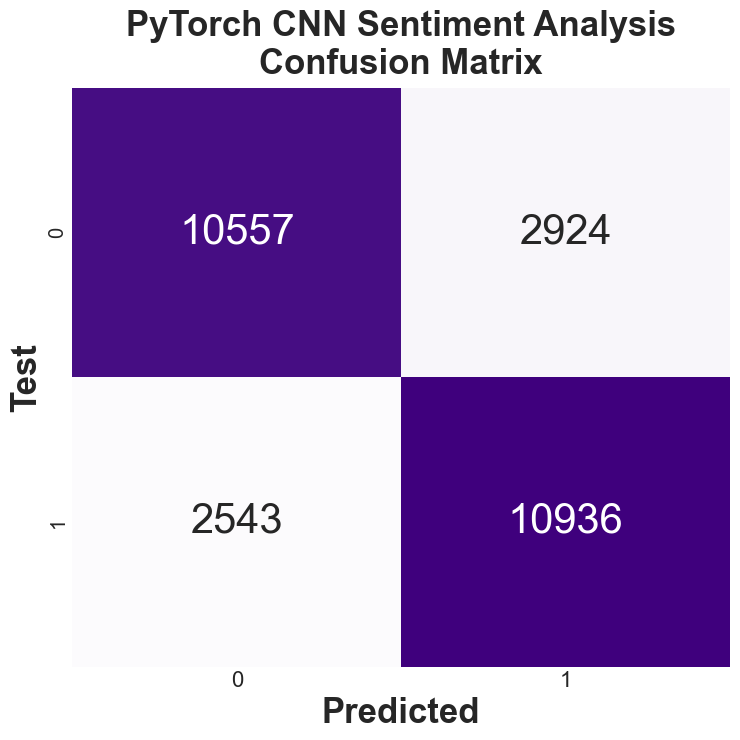

In [93]:
conf_matrix(y_test_list,y_pred_list,'PyTorch CNN Sentiment Analysis\nConfusion Matrix', ["0","1"])

In [94]:
def acc(y , yHat):
    truee = 0
    for i in range(len(y)):
        if(y[i] == yHat[i]):
            truee += 1
    return (truee / len(y))

In [95]:
print(acc(y_test_list , y_pred_list))

0.7972181008902077
